In [28]:
% pylab inline
import os
import random

import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer

Populating the interactive namespace from numpy and matplotlib


E:\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imread', 'test', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
root_dir = os.path.abspath(r"C:\Users\Hello\Desktop\age-detection-using-CNN-master")
data_dir = r'C:\Users\Hello\Desktop\age-detection-using-CNN-master\data'

train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


Age:  MIDDLE


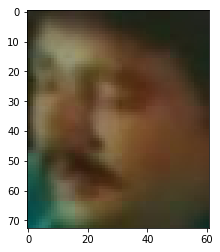

In [30]:

i = random.choice(train.index)


img_name = train.ID[i]
img = imread(os.path.join(data_dir, 'Train', img_name))


imshow(img)
print('Age: ', train.Class[i])

In [31]:
from scipy.misc import imresize

temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') 
    temp.append(img)
    #print(1)

train_x = np.stack(temp)

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
E:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


In [32]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
E:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [33]:
train_x = train_x / 255.
test_x = test_x / 255.

In [34]:
train.Class.value_counts(normalize=True)


MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [35]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [36]:

train_x_temp = train_x.reshape(-3, 32, 32, 3)

input_shape = (1024,)
input_reshape = (32, 32, 3)

conv_num_filters = 5
conv_filter_size = 5

pool_size = (2, 2)

hidden_num_units = 1536
output_num_units = 3

epochs = 7
batch_size = 250

model = Sequential([
 InputLayer(input_shape=input_reshape),

 Convolution2D(96, (3, 3), activation='relu'),
 MaxPooling2D(pool_size=pool_size),

 Convolution2D(256, (2, 2), activation='relu'),
 MaxPooling2D(pool_size=pool_size),

 Convolution2D(256, (2, 2), activation='relu'),
 MaxPooling2D(pool_size=pool_size),
        
 Convolution2D(384, (2, 2), activation='relu'),

 Flatten(),
 Dense(units=1536, activation='relu'),
 Dense(units=output_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 96)        2688      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 256)       98560     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 256)         262400    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 256)         0         
__________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.3)

Train on 13934 samples, validate on 5972 samples
Epoch 1/50
13934/13934 [==============================] - 552s 40ms/step - loss: 0.9439 - acc: 0.5284 - val_loss: 0.8824 - val_acc: 0.5795
Epoch 2/50
13934/13934 [==============================] - 548s 39ms/step - loss: 0.8210 - acc: 0.6302 - val_loss: 0.7691 - val_acc: 0.6673
Epoch 3/50
13934/13934 [==============================] - 505s 36ms/step - loss: 0.7490 - acc: 0.6727 - val_loss: 0.7346 - val_acc: 0.6812
Epoch 4/50
13934/13934 [==============================] - 483s 35ms/step - loss: 0.7106 - acc: 0.6955 - val_loss: 0.7036 - val_acc: 0.6927
Epoch 5/50
13934/13934 [==============================] - 420s 30ms/step - loss: 0.6782 - acc: 0.7023 - val_loss: 0.6756 - val_acc: 0.7076
Epoch 6/50
13934/13934 [==============================] - 396s 28ms/step - loss: 0.6408 - acc: 0.7256 - val_loss: 0.6578 - val_acc: 0.7195
Epoch 7/50
13934/13934 [==============================] - 394s 28ms/step - loss: 0.6168 - acc: 0.7307 - val_loss: 0.6

In [ ]:
sample_submission = pd.read_csv(os.path.join(data_dir, 'Sample_Submission.csv'))


In [ ]:
test_x_temp = test_x.reshape(-3, 32, 32, 3)
pred = model.predict_classes(test_x_temp)

pred.shape

In [ ]:
pred_f = lb.inverse_transform(pred)

In [ ]:
sample_submission.ID = test.ID; sample_submission.Class = pred_f
sample_submission.to_csv(os.path.join(data_dir, 'sub.csv'), index=False)

In [ ]:
sample_submission.shape